In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# from pandas_profiling import ProfileReport
from sklearn.metrics import roc_curve


from matplotlib import pyplot as plt 
%matplotlib inline 

In [14]:
df1 = pd.read_excel("Training Data Loan Cases.xlsx") #Data from our DB 
df2 = pd.read_excel("Training Customer Details.xlsx")#Data from CRB 

In [15]:
df1.head()

,CustomerId,ReferenceNumber,AppliedLoanAmount,InterestAmount,NegotiatedRecoveryRate,PrincipalArrears,InterestArrears,NegotiatedInstallments,DisbursedAmount,ApprovedDate,...,ClusteredId,NextExpectedPaymentDate,WriteOffStatus,IsLoanCaseAWriteOff,EndDate,PenaltyAmount,RollOverFee,IsRollOver,NumberOfTimesRolled,RolledOverAmount
0,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,1585,500,100.0,0,0.0,0.0,4,500,2018-05-17 13:18:58.503,...,1,2018-06-21 13:19:01.717,0,0,2018-06-14 13:19:01.707,0.0,0,0,0,0
1,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,2840,550,110.0,0,-137.5,-27.5,4,550,2018-06-11 17:17:06.330,...,2,2018-07-16 17:17:11.483,0,0,2018-07-09 17:17:11.473,0.0,0,0,0,0
2,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,4638,600,120.0,0,-150.0,-30.0,4,600,2018-07-10 19:39:00.000,...,3,2018-08-14 19:39:00.000,0,0,2018-08-07 19:39:00.000,0.0,0,0,0,0
3,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,5643,700,140.0,0,-175.0,-35.0,4,700,2018-08-11 12:44:38.773,...,4,2018-09-15 12:44:40.783,0,0,2018-09-08 12:44:40.777,0.0,0,0,0,0
4,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,7939,1100,220.0,0,0.0,0.0,4,1100,2018-09-09 06:22:44.960,...,5,2018-10-14 06:22:50.930,0,0,2018-10-07 06:22:50.920,0.0,0,0,0,0


In [16]:
df2.head()

,CustomerId,CreditScore,PrequalifiedAmount,ScoreOutput_MobiLoansScore,ScoreOutput_Probability,ScoreOutput_Grade,Account_FullSettledCount,Account_ActiveCount,Account_ClosedAccount,DateOfBirth,...,MaximumMobileLoanPrincipalAmount_MySector,MaximumMobileLoanPrincipalAmount_OtherSector,AverageMobileLoanPrincipalAmount_MySector,AverageMobileLoanPrincipalAmount_OtherSector,LastMobileLoanPrincipalAmount_MySector,LastMobileLoanPrincipalAmount_OtherSector,CustomerCreatedDate,Id,CustomerAge,PersoanlProfile_Age
0,0009D27E-E95D-C79F-78C0-08D61FFF73FC,NaN,2100,612,19.95,EE,0,0.0,0.0,1982-06-16,...,5000.0,1200,5000,780.00,5000.0,1200.0,2018-09-21 20:18:54.257000,0009D27E-E95D-C79F-78C0-08D61FFF73FC,36.0,36.0
1,000BB140-B5F1-C37F-379C-08D6969C2583,NaN,2500,647,15.52,CC,0,0.0,0.0,1983-10-10,...,0.0,10550,0,3237.50,0.0,10550.0,2019-02-19 18:57:50.793000,000BB140-B5F1-C37F-379C-08D6969C2583,35.0,35.0
2,0013F665-7C28-C247-AA2B-08D67FC3E4B0,NaN,2100,668,12.87,BB,0,0.0,0.0,1982-11-03,...,17000.0,8776.8,17000,4235.99,17000.0,1500.0,2019-01-21 17:14:25.163000,0013F665-7C28-C247-AA2B-08D67FC3E4B0,36.0,35.0
3,0016A9EB-DB46-CFD7-0AC0-08D685FF4498,NaN,3200,651,15.02,BB,0,0.0,0.0,1983-01-10,...,2000.0,4500,2000,4500.00,2000.0,4500.0,2019-01-29 15:34:33.347000,0016A9EB-DB46-CFD7-0AC0-08D685FF4498,36.0,36.0
4,001CC01D-8A45-C533-83BB-08D697272224,NaN,1100,635,16.99,CC,0,0.0,0.0,1986-03-24,...,1000.0,10050,1000,4936.16,1000.0,7800.0,2019-02-20 11:32:45.183000,001CC01D-8A45-C533-83BB-08D697272224,33.0,33.0


In [17]:
#transpose to see all the columns df1 
df1.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
CustomerId,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFB8203-98A7-C886-AC14-08D620754872,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,...,A5B016EE-0931-C148-539D-08D690CDFE60,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A590D9-874B-CE0D-7BC5-08D67978A764,A5A44B64-3D08-CE72-A532-08D69646AE3A,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67
ReferenceNumber,1585,2840,4638,5643,7939,11978,15770,32670,23164,23743,...,40635,31265,40640,26929,34583,8032,9992,11964,13835,17451
AppliedLoanAmount,500,550,600,700,1100,1300,1700,1200,1100,1200,...,1600,1400,1700,1000,1400,1100,1300,1300,1500,2000
InterestAmount,100.0,110.0,120.0,140.0,220.0,260.0,374.0,264.0,242.0,264.0,...,352.0,308.0,374.0,240.0,308.0,220.0,260.0,260.0,330.0,400.0
NegotiatedRecoveryRate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PrincipalArrears,0.0,-137.5,-150.0,-175.0,0.0,0.0,1574.0,1200.0,0.0,0.0,...,800.0,0.0,850.0,0.0,1400.0,0.0,-325.0,0.0,0.0,0.0
InterestArrears,0.0,-27.5,-30.0,-35.0,0.0,0.0,0.0,214.0,0.0,0.0,...,126.0,0.0,137.0,0.0,308.0,0.0,-65.0,0.0,0.0,0.0
NegotiatedInstallments,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
DisbursedAmount,500,550,600,700,1100,1300,1700,1200,1100,1200,...,1600,1400,1700,1000,1400,1100,1300,1300,1500,2000
ApprovedDate,2018-05-17 13:18:58.503000,2018-06-11 17:17:06.330000,2018-07-10 19:39:00,2018-08-11 12:44:38.773000,2018-09-09 06:22:44.960000,2018-10-10 14:51:56.247000,2018-11-10 22:02:47.703000,2019-02-14 11:14:14.787000,2019-01-15 12:43:48.153000,2019-01-17 09:15:44.810000,...,2019-03-09 09:35:11.143000,2019-02-10 14:41:18.867000,2019-03-09 09:46:14.157000,2019-01-29 11:13:59.617000,2019-02-19 17:49:26.087000,2018-09-09 22:36:01.407000,2018-09-25 19:09:19.653000,2018-10-10 12:44:17.470000,2018-10-27 11:24:01.070000,2018-11-28 12:39:05.187000


In [18]:
#transpose to see all the columns for df2
df2.T

,0,1,2,3,4,5,6,7,8,9,...,8932,8933,8934,8935,8936,8937,8938,8939,8940,8941
CustomerId,0009D27E-E95D-C79F-78C0-08D61FFF73FC,000BB140-B5F1-C37F-379C-08D6969C2583,0013F665-7C28-C247-AA2B-08D67FC3E4B0,0016A9EB-DB46-CFD7-0AC0-08D685FF4498,001CC01D-8A45-C533-83BB-08D697272224,001D5CF7-643B-C6D3-D607-08D692A83A97,00235D25-7587-C3B7-9D8C-08D62003CD0C,00341DA9-914C-CA58-6951-08D67217DB7B,003CDD18-A643-C88C-CDF2-08D68A173681,003FF44B-1E47-C4EC-DFEE-08D68535B12A,...,FFB45B31-B616-C288-E50E-08D6416E6A5A,FFB4F094-79EE-CCB1-434E-08D650872C72,FFBD0690-7EF4-C813-1C26-08D662C7796D,FFC21D55-FBC9-C2C8-535E-08D68F3A5E37,FFD73729-2107-CFF7-4979-08D65B0773B8,FFD7E82F-55F1-C4B4-5F3D-08D69B4F221A,FFDA9528-37CA-C7F7-F3C6-08D67FC13FCE,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFFB8203-98A7-C886-AC14-08D620754872
CreditScore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrequalifiedAmount,2100,2500,2100,3200,1100,1400,3800,3000,2500,3200,...,5000,3300,3000,2100,2100,1100,1200,2500,0,1200
ScoreOutput_MobiLoansScore,612,647,668,651,635,678,660,673,659,659,...,680,639,644,668,637,639,653,668,639,286
ScoreOutput_Probability,19.95,15.52,12.87,15.02,16.99,11.57,13.89,12.24,14.01,14.01,...,11.3,16.63,15.89,12.87,16.77,16.63,14.79,12.87,16.63,61.62
ScoreOutput_Grade,EE,CC,BB,BB,CC,AA,BB,AA,BB,BB,...,AA,CC,CC,BB,CC,CC,BB,BB,CC,GG
Account_FullSettledCount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Account_ActiveCount,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Account_ClosedAccount,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DateOfBirth,1982-06-16 00:00:00,1983-10-10 00:00:00,1982-11-03 00:00:00,1983-01-10 00:00:00,1986-03-24 00:00:00,1971-11-18 00:00:00,1984-02-29 00:00:00,1982-12-12 00:00:00,1988-10-23 00:00:00,1989-10-11 00:00:00,...,1983-01-03 00:00:00,1993-05-30 00:00:00,1985-02-15 00:00:00,1977-03-27 00:00:00,1987-03-14 00:00:00,1995-10-26 00:00:00,1995-11-13 00:00:00,1993-02-05 00:00:00,1992-08-02 00:00:00,1987-08-30 00:00:00


In [19]:
df1.shape

(10000, 37)

In [20]:
df2.shape

(8942, 57)

In [21]:
df1.CustomerId.nunique()

3489

In [22]:
df2.CustomerId.nunique()

8941

In [23]:
# join the two dataframes 
df = df1.merge(df2, how='left', on='CustomerId')

In [24]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
CustomerId,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFD0D7B-DF6A-C7F4-0329-08D5BBDC249C,FFFB8203-98A7-C886-AC14-08D620754872,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,...,A5B016EE-0931-C148-539D-08D690CDFE60,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A590D9-874B-CE0D-7BC5-08D67978A764,A5A44B64-3D08-CE72-A532-08D69646AE3A,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67
ReferenceNumber,1585,2840,4638,5643,7939,11978,15770,32670,23164,23743,...,40635,31265,40640,26929,34583,8032,9992,11964,13835,17451
AppliedLoanAmount,500,550,600,700,1100,1300,1700,1200,1100,1200,...,1600,1400,1700,1000,1400,1100,1300,1300,1500,2000
InterestAmount,100.0,110.0,120.0,140.0,220.0,260.0,374.0,264.0,242.0,264.0,...,352.0,308.0,374.0,240.0,308.0,220.0,260.0,260.0,330.0,400.0
NegotiatedRecoveryRate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LastMobileLoanPrincipalAmount_OtherSector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,1800.0,6200.0,...,500.0,14500.0,14500.0,13000.0,2200.0,25000.0,25000.0,25000.0,25000.0,25000.0
CustomerCreatedDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 10:22:21.823000,2018-12-24 18:59:52.587000,2019-01-16 21:08:21.710000,...,2019-02-12 09:39:32.993000,2018-12-26 15:55:02.933000,2018-12-26 15:55:02.933000,2019-01-13 17:00:43.093000,2019-02-19 08:46:03.447000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FFFB8203-98A7-C886-AC14-08D620754872,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,...,A5B016EE-0931-C148-539D-08D690CDFE60,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A590D9-874B-CE0D-7BC5-08D67978A764,A5A44B64-3D08-CE72-A532-08D69646AE3A,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67
CustomerAge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,26.0,26.0,...,40.0,32.0,32.0,32.0,23.0,32.0,32.0,32.0,32.0,32.0


In [25]:
#check one customer 
cust1 = df[df['CustomerId'] == 'AA5E8F7C-AC81-C004-325A-08D57E2DF1D6']
           
           
# 'C18E32AF-3E47-CF46-A827-08D627136498' - 3 deafaulted

# C18E32AF-3E47-CF46-A827-08D627136498 status - 6

In [26]:
df.PenaltyAmount.value_counts()

0.0      8676
147.0     228
171.0     211
135.0     200
159.0     144
         ... 
515.0       1
42.0        1
33.0        1
225.0       1
128.0       1
Name: PenaltyAmount, Length: 97, dtype: int64

In [27]:
df.CustomerId.nunique()

3489

In [28]:
df[df['Status'] == 7]

,CustomerId,ReferenceNumber,AppliedLoanAmount,InterestAmount,NegotiatedRecoveryRate,PrincipalArrears,InterestArrears,NegotiatedInstallments,DisbursedAmount,ApprovedDate,...,MaximumMobileLoanPrincipalAmount_MySector,MaximumMobileLoanPrincipalAmount_OtherSector,AverageMobileLoanPrincipalAmount_MySector,AverageMobileLoanPrincipalAmount_OtherSector,LastMobileLoanPrincipalAmount_MySector,LastMobileLoanPrincipalAmount_OtherSector,CustomerCreatedDate,Id,CustomerAge,PersoanlProfile_Age
447,FBA0EDBF-F846-C74A-90AD-08D5A90F0806,780,160,32.0,0,80.0,16.0,4,160,2018-04-23 11:42:29.447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,FA3F19C2-5607-C9EE-2036-08D5A91BE3E1,796,160,32.0,0,80.0,16.0,4,160,2018-04-23 13:14:39.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,F9655CCD-543E-CA32-B53D-08D5A8A3B986,731,160,32.0,0,80.0,16.0,4,160,2018-04-22 22:54:53.717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,F687AEFC-5A44-C012-919C-08D5910513E3,162,100,20.0,0,100.0,20.0,4,100,2018-03-23 21:29:48.680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,F64BE8E7-0ADC-CC43-80D1-08D5A86A35ED,712,160,16.0,0,160.0,16.0,1,160,2018-04-22 16:02:58.523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1489,F1F237A2-4961-C2A3-2800-08D591ADED3D,170,100,20.0,0,100.0,20.0,4,100,2018-03-24 17:40:59.320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948,EE0072D7-BF90-CEB5-67CE-08D5A8F0CCA9,752,160,32.0,0,80.0,16.0,4,160,2018-04-23 08:06:32.830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,EC986FBE-761C-CED9-B440-08D57032F283,51,200,5.0,0,200.0,5.0,1,200,2018-02-10 03:09:05.537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2205,EBE4DCEE-3DBD-CA4F-56FE-08D570A5605E,57,200,5.0,0,197.0,0.0,1,200,2018-02-10 16:45:35.913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384,E9D4231E-E805-CE79-99F9-08D5A91A0BE5,793,160,32.0,0,80.0,16.0,4,160,2018-04-23 13:01:44.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.Status.value_counts()

6    7334
3    2635
7      31
Name: Status, dtype: int64

In [30]:
cust1[['Status','PenaltyAmount']]

,Status,PenaltyAmount
9434,7,0.0


# Handle Missing Data

In [31]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [32]:
missing_value_df.sort_values(by='percent_missing', ascending=False).head(30)

,column_name,percent_missing
CreditScore,CreditScore,98.12
ScoreOutput_Probability,ScoreOutput_Probability,20.17
ScoreOutput_Grade,ScoreOutput_Grade,19.24
ScoreOutput_MobiLoansScore,ScoreOutput_MobiLoansScore,19.24
PersonalProfile_DateOfBirth,PersonalProfile_DateOfBirth,19.19
CountofOpenPerformingAccounts_MySector,CountofOpenPerformingAccounts_MySector,19.19
CountofMobileLoanAccounts_MySector,CountofMobileLoanAccounts_MySector,19.19
CountofClosedPerformingAccountswithDefaultHistory_OtherSector,CountofClosedPerformingAccountswithDefaultHist...,19.19
CountofClosedPerformingAccountswithDefaultHistory_MySector,CountofClosedPerformingAccountswithDefaultHist...,19.19
CountofOpenPerformingAccountswithDefaultHistory_OtherSector,CountofOpenPerformingAccountswithDefaultHistor...,19.19


In [33]:
df.drop(['CreditScore'], axis=1, inplace=True)

In [34]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [35]:
missing_value_df

,column_name,percent_missing
CustomerId,CustomerId,0.00
ReferenceNumber,ReferenceNumber,0.00
AppliedLoanAmount,AppliedLoanAmount,0.00
InterestAmount,InterestAmount,0.00
NegotiatedRecoveryRate,NegotiatedRecoveryRate,0.00
...,...,...
LastMobileLoanPrincipalAmount_OtherSector,LastMobileLoanPrincipalAmount_OtherSector,19.19
CustomerCreatedDate,CustomerCreatedDate,19.19
Id,Id,19.19
CustomerAge,CustomerAge,19.19


In [36]:
#drop all missing rows 
df.dropna(inplace=True)

In [37]:
df.CountOfNonPerformingClosedAccounts_MySector.value_counts()

0.0    7529
1.0     419
2.0      31
4.0       2
3.0       2
Name: CountOfNonPerformingClosedAccounts_MySector, dtype: int64

In [38]:
df.Status.value_counts()

6    5574
3    2409
Name: Status, dtype: int64

## Data profile 

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

### Type inference: detect the types of columns in a dataframe.
* Essentials: type, unique values, missing values
* Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
* Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* Most frequent values
* Histogram
* Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
Missing values matrix, count, heatmap and dendrogram of missing values

In [39]:
# # chaking the data profile 
# prof = ProfileReport(df)

In [40]:
# prof

In [41]:
# prof.to_file("df1_report.html")

In [42]:
df.head()

,CustomerId,ReferenceNumber,AppliedLoanAmount,InterestAmount,NegotiatedRecoveryRate,PrincipalArrears,InterestArrears,NegotiatedInstallments,DisbursedAmount,ApprovedDate,...,MaximumMobileLoanPrincipalAmount_MySector,MaximumMobileLoanPrincipalAmount_OtherSector,AverageMobileLoanPrincipalAmount_MySector,AverageMobileLoanPrincipalAmount_OtherSector,LastMobileLoanPrincipalAmount_MySector,LastMobileLoanPrincipalAmount_OtherSector,CustomerCreatedDate,Id,CustomerAge,PersoanlProfile_Age
7,FFFB8203-98A7-C886-AC14-08D620754872,32670,1200,264.0,0,1200.0,214.0,4,1200,2019-02-14 11:14:14.787,...,1000.0,2400,1000,1450.00,1000.0,2400.0,2018-09-22 10:22:21.823000,FFFB8203-98A7-C886-AC14-08D620754872,31.0,31.0
8,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,23164,1100,242.0,0,0.0,0.0,4,1100,2019-01-15 12:43:48.153,...,2000.0,1800,2000,1397.78,2000.0,1800.0,2018-12-24 18:59:52.587000,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,26.0,26.0
9,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,23743,1200,264.0,0,0.0,0.0,4,1200,2019-01-17 09:15:44.810,...,10000.0,6200,6000,5140.00,2000.0,6200.0,2019-01-16 21:08:21.710000,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,26.0,26.0
10,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,26218,1600,352.0,0,0.0,0.0,4,1600,2019-01-26 13:02:51.977,...,10000.0,6200,6000,5140.00,2000.0,6200.0,2019-01-16 21:08:21.710000,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,26.0,26.0
11,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,36079,1900,380.0,0,0.0,0.0,4,1900,2019-02-24 22:02:13.140,...,10000.0,6200,6000,5140.00,2000.0,6200.0,2019-01-16 21:08:21.710000,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,26.0,26.0


In [43]:
df.head().T

,7,8,9,10,11
CustomerId,FFFB8203-98A7-C886-AC14-08D620754872,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F
ReferenceNumber,32670,23164,23743,26218,36079
AppliedLoanAmount,1200,1100,1200,1600,1900
InterestAmount,264.0,242.0,264.0,352.0,380.0
NegotiatedRecoveryRate,0,0,0,0,0
...,...,...,...,...,...
LastMobileLoanPrincipalAmount_OtherSector,2400.0,1800.0,6200.0,6200.0,6200.0
CustomerCreatedDate,2018-09-22 10:22:21.823000,2018-12-24 18:59:52.587000,2019-01-16 21:08:21.710000,2019-01-16 21:08:21.710000,2019-01-16 21:08:21.710000
Id,FFFB8203-98A7-C886-AC14-08D620754872,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F
CustomerAge,31.0,26.0,26.0,26.0,26.0


In [44]:
df.dtypes

CustomerId                                    object
ReferenceNumber                                int64
AppliedLoanAmount                              int64
InterestAmount                               float64
NegotiatedRecoveryRate                         int64
                                              ...   
LastMobileLoanPrincipalAmount_OtherSector    float64
CustomerCreatedDate                           object
Id                                            object
CustomerAge                                  float64
PersoanlProfile_Age                          float64
Length: 92, dtype: object

In [45]:
# View all categorical features
df_cat = df.select_dtypes(include=['object'])
df_cat.T

,7,8,9,10,11,12,17,18,19,20,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
CustomerId,FFFB8203-98A7-C886-AC14-08D620754872,FFF35D60-D9BC-C83E-B359-08D669D1FC8F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,FFDA9528-37CA-C7F7-F3C6-08D67FC13FCE,FFD7E82F-55F1-C4B4-5F3D-08D69B4F221A,FFD73729-2107-CFF7-4979-08D65B0773B8,FFD73729-2107-CFF7-4979-08D65B0773B8,...,A5B016EE-0931-C148-539D-08D690CDFE60,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A876B8-F87A-C49A-9291-08D66B4A7F70,A5A590D9-874B-CE0D-7BC5-08D67978A764,A5A44B64-3D08-CE72-A532-08D69646AE3A,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67,A59F6C2E-3D76-C3E3-AC5B-08D616A40E67
PrequalifiedAmount,1200,0,2500,2500,2500,2500,1200,1100,2100,2100,...,2100,2100,2100,1400,1400,0,0,0,0,0
ScoreOutput_MobiLoansScore,286,639,668,668,668,668,653,639,637,637,...,662,670,670,659,675,668,668,668,668,668
ScoreOutput_Probability,61.62,16.63,12.87,12.87,12.87,12.87,14.79,16.63,16.77,16.77,...,13.59,12.58,12.58,14.01,11.94,12.86,12.86,12.86,12.86,12.86
ScoreOutput_Grade,GG,CC,BB,BB,BB,BB,BB,CC,CC,CC,...,BB,AA,AA,BB,AA,BB,BB,BB,BB,BB
Account_FullSettledCount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PersonalProfile_DateOfBirth,1987-08-30 00:00:00,1992-08-02 00:00:00,1993-02-05 00:00:00,1993-02-05 00:00:00,1993-02-05 00:00:00,1993-02-05 00:00:00,1995-11-13 00:00:00,1995-10-26 00:00:00,1987-03-14 00:00:00,1987-03-14 00:00:00,...,1979-11-02 00:00:00,1987-01-01 00:00:00,1987-01-01 00:00:00,1986-01-01 00:00:00,1995-12-24 00:00:00,1986-11-13 00:00:00,1986-11-13 00:00:00,1986-11-13 00:00:00,1986-11-13 00:00:00,1986-11-13 00:00:00
MaximumMobileLoanPrincipalAmount_OtherSector,2400,1800,6200,6200,6200,6200,6350,2400,4000,4000,...,5000,28750,28750,15000,10500,25000,25000,25000,25000,25000
AverageMobileLoanPrincipalAmount_MySector,1000,2000,6000,6000,6000,6000,0,3620,500,500,...,16000,6000,6000,0,1000,10000,10000,10000,10000,10000
CustomerCreatedDate,2018-09-22 10:22:21.823000,2018-12-24 18:59:52.587000,2019-01-16 21:08:21.710000,2019-01-16 21:08:21.710000,2019-01-16 21:08:21.710000,2019-01-16 21:08:21.710000,2019-01-21 16:55:29.547000,2019-02-25 18:29:09.637000,2018-12-05 23:14:48.387000,2018-12-05 23:14:48.387000,...,2019-02-12 09:39:32.993000,2018-12-26 15:55:02.933000,2018-12-26 15:55:02.933000,2019-01-13 17:00:43.093000,2019-02-19 08:46:03.447000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000,2018-09-09 22:31:59.163000


In [46]:
#Transforming objects to int 
#Transforming required numerical features to categorical
cols1 = ['PrequalifiedAmount','ScoreOutput_MobiLoansScore',
        'ScoreOutput_Probability','Account_FullSettledCount','MaximumMobileLoanPrincipalAmount_OtherSector',
       'AverageMobileLoanPrincipalAmount_MySector']
for i in cols1:
    df[i]= df[i].apply(int)


In [47]:
#apply LabelEncoder to categorical features
cols2 = ['ScoreOutput_Grade']
for c in cols2:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))
#shape
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (7983, 92)


In [48]:
cols3 = df.select_dtypes(include=['datetime64']).columns

In [49]:
cols3 = cols3.to_list()
cols3

['ApprovedDate',
 'DisbursementDate',
 'StartDate',
 'NextPaymentDate',
 'CreatedDate',
 'NextExpectedPaymentDate',
 'EndDate',
 'DateOfBirth']

In [50]:
for i in cols3:
    df[i]= df[i].values.astype('datetime64[D]')
#     df[i].values.astype('datetime64[D]')

In [51]:
cols4 = df.select_dtypes(include=['float64']).columns
cols4 = cols4.to_list()

In [52]:
for i in cols4:
    df[i]= df[i].apply(int)

## Visualizethe imbalance in the data

In [53]:
dfpaid = df[df["Status"] == 6] #paid
dfdefaulted = df[df["Status"] == 3] #defaulted

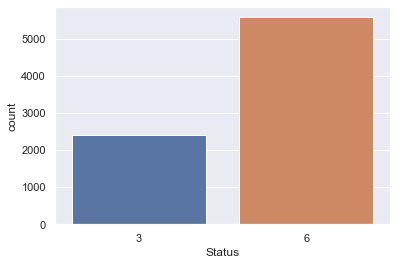

In [54]:
sns.set(style="darkgrid")
import seaborn as sns
ax = sns.countplot(x="Status", data=df)

In [55]:
#undersampling
defaulted = len(df[df["Status"] == 3])
paid_indices = df[df["Status"] == 6].index

random_indices = np.random.choice(paid_indices,defaulted,replace =False)
defaulted_indices = df[df["Status"] == 3].index

under_sample_indices = np.concatenate([defaulted_indices,random_indices])
under_sample = df.loc[under_sample_indices]

<AxesSubplot:xlabel='Status', ylabel='count'>

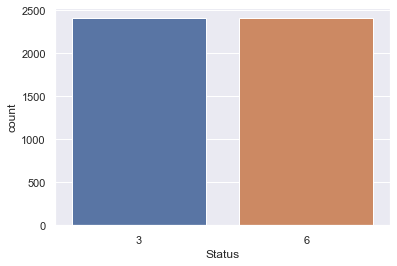

In [56]:
sns.countplot(x='Status', data=under_sample)

In [57]:
under_sample.head()

,CustomerId,ReferenceNumber,AppliedLoanAmount,InterestAmount,NegotiatedRecoveryRate,PrincipalArrears,InterestArrears,NegotiatedInstallments,DisbursedAmount,ApprovedDate,...,MaximumMobileLoanPrincipalAmount_MySector,MaximumMobileLoanPrincipalAmount_OtherSector,AverageMobileLoanPrincipalAmount_MySector,AverageMobileLoanPrincipalAmount_OtherSector,LastMobileLoanPrincipalAmount_MySector,LastMobileLoanPrincipalAmount_OtherSector,CustomerCreatedDate,Id,CustomerAge,PersoanlProfile_Age
7,FFFB8203-98A7-C886-AC14-08D620754872,32670,1200,264,0,1200,214,4,1200,2019-02-14,...,1000,2400,1000,1450,1000,2400,2018-09-22 10:22:21.823000,FFFB8203-98A7-C886-AC14-08D620754872,31,31
12,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,44914,2500,500,0,0,0,4,2500,2019-03-22,...,10000,6200,6000,5140,2000,6200,2019-01-16 21:08:21.710000,FFF1C684-EEB4-CFA3-1413-08D67BF6BF0F,26,26
17,FFDA9528-37CA-C7F7-F3C6-08D67FC13FCE,39536,1200,264,0,0,0,4,1200,2019-03-06,...,0,6350,0,5325,0,6350,2019-01-21 16:55:29.547000,FFDA9528-37CA-C7F7-F3C6-08D67FC13FCE,23,23
18,FFD7E82F-55F1-C4B4-5F3D-08D69B4F221A,36748,1100,242,0,825,121,4,1100,2019-02-27,...,5000,2400,3620,480,3100,300,2019-02-25 18:29:09.637000,FFD7E82F-55F1-C4B4-5F3D-08D69B4F221A,23,23
21,FFD73729-2107-CFF7-4979-08D65B0773B8,36766,1600,352,0,1200,264,4,1600,2019-02-27,...,500,4000,500,1319,500,1000,2018-12-05 23:14:48.387000,FFD73729-2107-CFF7-4979-08D65B0773B8,32,32


In [58]:
under_sample.columns

Index(['CustomerId', 'ReferenceNumber', 'AppliedLoanAmount', 'InterestAmount',
       'NegotiatedRecoveryRate', 'PrincipalArrears', 'InterestArrears',
       'NegotiatedInstallments', 'DisbursedAmount', 'ApprovedDate',
       'DisbursementDate', 'StartDate', 'Status', 'DisbursementMethod',
       'NextPaymentDate', 'InterestRateChargeType', 'InterestRateValue',
       'PaymentFrequency', 'AcceptPrepayment', 'PrincipalRecoveryMethod',
       'GracePeriod', 'MinimumTerm', 'MaximumTerm', 'TermType', 'Type',
       'RequestSource', 'CreatedDate', 'ClusteredId',
       'NextExpectedPaymentDate', 'WriteOffStatus', 'IsLoanCaseAWriteOff',
       'EndDate', 'PenaltyAmount', 'RollOverFee', 'IsRollOver',
       'NumberOfTimesRolled', 'RolledOverAmount', 'PrequalifiedAmount',
       'ScoreOutput_MobiLoansScore', 'ScoreOutput_Probability',
       'ScoreOutput_Grade', 'Account_FullSettledCount', 'Account_ActiveCount',
       'Account_ClosedAccount', 'DateOfBirth', 'PersonalProfile_DateOfBirth',
    

In [59]:
under_sample.drop(['Id','ReferenceNumber','CustomerId','ApprovedDate',
 'DisbursementDate',
 'StartDate',
 'NextPaymentDate',
 'CreatedDate',
 'NextExpectedPaymentDate',
 'EndDate',
 'DateOfBirth','CustomerCreatedDate','PersonalProfile_DateOfBirth'], axis=1,inplace=True )

## Setting up the validation framework


In [60]:
df = under_sample

In [61]:
df

,AppliedLoanAmount,InterestAmount,NegotiatedRecoveryRate,PrincipalArrears,InterestArrears,NegotiatedInstallments,DisbursedAmount,Status,DisbursementMethod,InterestRateChargeType,...,MinimumMobileLoanPrincipalAmount_MySector,MinimumMobileLoanPrincipalAmount_OtherSector,MaximumMobileLoanPrincipalAmount_MySector,MaximumMobileLoanPrincipalAmount_OtherSector,AverageMobileLoanPrincipalAmount_MySector,AverageMobileLoanPrincipalAmount_OtherSector,LastMobileLoanPrincipalAmount_MySector,LastMobileLoanPrincipalAmount_OtherSector,CustomerAge,PersoanlProfile_Age
7,1200,264,0,1200,214,4,1200,3,1,1,...,1000,500,1000,2400,1000,1450,1000,2400,31,31
12,2500,500,0,0,0,4,2500,3,1,1,...,2000,1800,10000,6200,6000,5140,2000,6200,26,26
17,1200,264,0,0,0,4,1200,3,1,1,...,0,4300,0,6350,0,5325,0,6350,23,23
18,1100,242,0,825,121,4,1100,3,1,1,...,2000,0,5000,2400,3620,480,3100,300,23,23
21,1600,352,0,1200,264,4,1600,3,1,1,...,500,100,500,4000,500,1319,500,1000,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,2000,400,0,0,0,4,2000,6,1,1,...,29000,0,29000,5500,29000,4455,29000,4050,41,42
1246,2500,500,0,0,0,4,2500,6,1,1,...,0,3000,0,20000,0,8585,0,9800,42,43
5087,1500,330,0,0,0,4,1500,6,1,1,...,1000,100,1000,11000,1000,4018,1000,2500,25,25
2390,1300,286,0,0,0,4,1300,6,1,1,...,6600,1400,22000,93300,11337,19877,9000,18000,34,34


In [62]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train_full = df_train_full.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.Status.values
y_val = df_val.Status.values

del df_train['Status']
del df_val['Status']

## Random Forest

In [94]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(df_train, y_train)
y_pred = rf.predict_proba(df_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9697595054095827

## Evaluation

In [95]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(df_train, y_train)
    y_pred = rf.predict_proba(df_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.976
20 -> 0.978
30 -> 0.979
40 -> 0.981
50 -> 0.980
60 -> 0.981
70 -> 0.981
80 -> 0.981
90 -> 0.981
100 -> 0.982
110 -> 0.982
120 -> 0.982
130 -> 0.983
140 -> 0.982
150 -> 0.982
160 -> 0.983
170 -> 0.983
180 -> 0.983
190 -> 0.983
200 -> 0.983


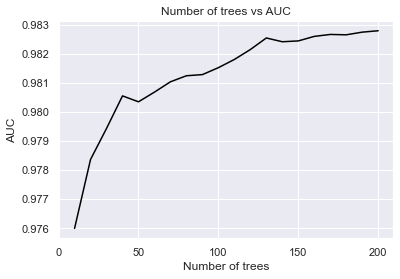

In [96]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [97]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(df_train, y_train)
        y_pred = rf.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()
    

depth: 5
10 -> 0.975
20 -> 0.978
30 -> 0.979
40 -> 0.980
50 -> 0.980
60 -> 0.982
70 -> 0.982
80 -> 0.982
90 -> 0.982
100 -> 0.982
110 -> 0.982
120 -> 0.982
130 -> 0.982
140 -> 0.983
150 -> 0.983
160 -> 0.982
170 -> 0.982
180 -> 0.982
190 -> 0.982
200 -> 0.982

depth: 10
10 -> 0.976
20 -> 0.980
30 -> 0.983
40 -> 0.984
50 -> 0.984
60 -> 0.985
70 -> 0.985
80 -> 0.985
90 -> 0.985
100 -> 0.985
110 -> 0.985
120 -> 0.985
130 -> 0.985
140 -> 0.985
150 -> 0.985
160 -> 0.985
170 -> 0.985
180 -> 0.985
190 -> 0.985
200 -> 0.985

depth: 20
10 -> 0.976
20 -> 0.981
30 -> 0.982
40 -> 0.983
50 -> 0.983
60 -> 0.984
70 -> 0.984
80 -> 0.984
90 -> 0.984
100 -> 0.984
110 -> 0.984
120 -> 0.984
130 -> 0.984
140 -> 0.985
150 -> 0.985
160 -> 0.985
170 -> 0.984
180 -> 0.984
190 -> 0.984
200 -> 0.984



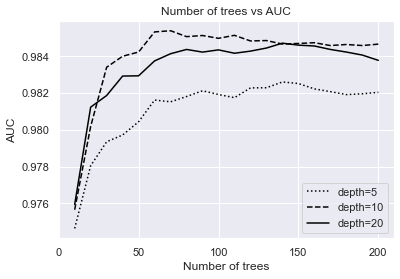

In [98]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [99]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(df_train, y_train)
        y_pred = rf.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.979
30 -> 0.982
50 -> 0.984
70 -> 0.984
90 -> 0.984
110 -> 0.984
130 -> 0.984
150 -> 0.984
170 -> 0.984
190 -> 0.984

min_samples_leaf: 5
10 -> 0.981
30 -> 0.985
50 -> 0.985
70 -> 0.984
90 -> 0.984
110 -> 0.983
130 -> 0.984
150 -> 0.984
170 -> 0.984
190 -> 0.984

min_samples_leaf: 10
10 -> 0.980
30 -> 0.983
50 -> 0.984
70 -> 0.984
90 -> 0.984
110 -> 0.983
130 -> 0.983
150 -> 0.983
170 -> 0.983
190 -> 0.983



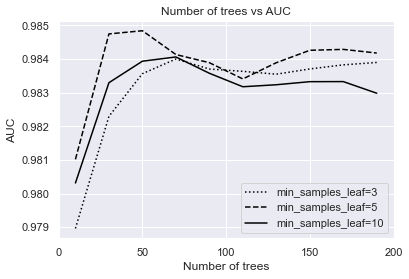

In [100]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

## Final Model

In [111]:
dv = DictVectorizer(sparse=False)
dv

DictVectorizer(sparse=False)

In [101]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(df_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [102]:
y_pred_rf = rf.predict_proba(df_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.9841941267387945

## Evaluate Final model

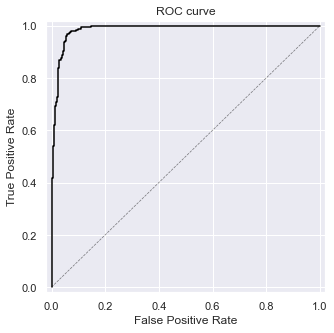

In [60]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf, pos_label=6)
plt.plot(fpr, tpr, color='black')


plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## feature importance


In [61]:
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

In [62]:
dict_train[0]

{'AppliedLoanAmount': 1400,
 'InterestAmount': 308,
 'NegotiatedRecoveryRate': 0,
 'PrincipalArrears': 0,
 'InterestArrears': 0,
 'NegotiatedInstallments': 4,
 'DisbursedAmount': 1400,
 'DisbursementMethod': 1,
 'InterestRateChargeType': 1,
 'InterestRateValue': 5,
 'PaymentFrequency': 0,
 'AcceptPrepayment': 1,
 'PrincipalRecoveryMethod': 0,
 'GracePeriod': 0,
 'MinimumTerm': 1,
 'MaximumTerm': 1,
 'TermType': 2,
 'Type': 1,
 'RequestSource': 1,
 'ClusteredId': 7834,
 'WriteOffStatus': 0,
 'IsLoanCaseAWriteOff': 0,
 'PenaltyAmount': 86,
 'RollOverFee': 0,
 'IsRollOver': 0,
 'NumberOfTimesRolled': 0,
 'RolledOverAmount': 0,
 'PrequalifiedAmount': 0,
 'ScoreOutput_MobiLoansScore': 680,
 'ScoreOutput_Probability': 11,
 'ScoreOutput_Grade': 0,
 'Account_FullSettledCount': 0,
 'Account_ActiveCount': 0,
 'Account_ClosedAccount': 0,
 'LengthOfCreditHistoryInMonths_MySector': 8,
 'LengthOfCreditHistoryInMonths_OtherSector': 29,
 'CountOfNonPerformingAccounts_MySector': 0,
 'CountOfNonPerformi

In [63]:
dv = DictVectorizer(sparse=False)
dv

DictVectorizer(sparse=False)

In [64]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [65]:
rf.feature_importances_

array([3.23916791e-02, 3.65597833e-02, 0.00000000e+00, 3.77630126e-01,
       2.61904115e-01, 0.00000000e+00, 3.50197140e-02, 0.00000000e+00,
       0.00000000e+00, 1.71008640e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15299627e-03, 5.25916746e-03,
       0.00000000e+00, 1.24805243e-02, 7.26519929e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.96688878e-02,
       5.39042703e-03, 3.43600393e-03, 1.76639268e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.57801817e-03, 6.47548319e-03,
       2.05745592e-04, 2.28846110e-04, 8.14645290e-04, 6.84960045e-04,
       2.04369668e-04, 1.92550367e-04, 3.37702770e-03, 5.80436689e-03,
       2.54923190e-03, 4.93448051e-03, 1.38263790e-03, 5.99244775e-03,
       8.54171606e-04, 8.32079271e-04, 7.56639784e-05, 0.00000000e+00,
       1.03700408e-03, 9.69507330e-04, 5.27119211e-03, 0.00000000e+00,
      

In [66]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

In [67]:
df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
3,Account_FullSettledCount,0.377630
4,AppliedLoanAmount,0.261904
22,CountofClosedPerformingMobileLoanAccountswithD...,0.072652
27,CountofOpenNonPerformingMobileLoanAccounts_Oth...,0.039669
1,Account_ActiveCount,0.036560
...,...,...
33,CountofOpenPerformingMobileLoanAccounts_OtherS...,0.000000
11,CountOfNonPerformingClosedAccounts_OtherSector,0.000000
16,CountofClosedPerformingAccounts_MySector,0.000000
10,CountOfNonPerformingClosedAccounts_MySector,0.000000


In [68]:
df_importance = df_importance[df_importance.gain > 0.01]

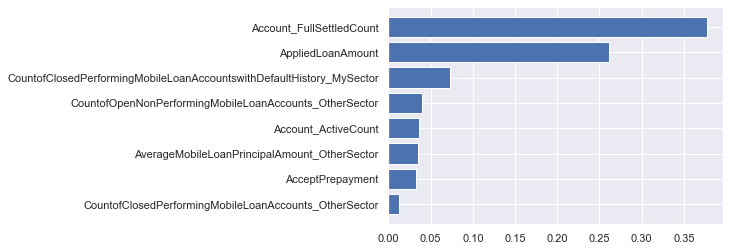

In [69]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## Saving the model

In [70]:
import pickle #saving python objects 

with open ('credit-model.bin', 'wb') as f_out:
    pickle.dump((dv, rf), f_out)

## Loading the model

In [1]:
import pickle


In [2]:
model_file = 'credit-model.bin'

In [3]:
with open (model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [4]:
customer = {'AppliedLoanAmount': 1600,
 'InterestAmount': 352,
 'NegotiatedRecoveryRate': 0,
 'PrincipalArrears': 0,
 'InterestArrears': 0,
 'NegotiatedInstallments': 4,
 'DisbursedAmount': 1600,
 'DisbursementMethod': 1,
 'InterestRateChargeType': 1,
 'InterestRateValue': 5,
 'PaymentFrequency': 0,
 'AcceptPrepayment': 1,
 'PrincipalRecoveryMethod': 0,
 'GracePeriod': 0,
 'MinimumTerm': 1,
 'MaximumTerm': 1,
 'TermType': 2,
 'Type': 1,
 'RequestSource': 1,
 'ClusteredId': 3867,
 'WriteOffStatus': 0,
 'IsLoanCaseAWriteOff': 0,
 'PenaltyAmount': 0,
 'RollOverFee': 0,
 'IsRollOver': 0,
 'NumberOfTimesRolled': 0,
 'RolledOverAmount': 0,
 'PrequalifiedAmount': 2500,
 'ScoreOutput_MobiLoansScore': 644,
 'ScoreOutput_Probability': 15,
 'ScoreOutput_Grade': 2,
 'Account_FullSettledCount': 0,
 'Account_ActiveCount': 0,
 'Account_ClosedAccount': 0,
 'LengthOfCreditHistoryInMonths_MySector': 12,
 'LengthOfCreditHistoryInMonths_OtherSector': 23,
 'CountOfNonPerformingAccounts_MySector': 0,
 'CountOfNonPerformingAccounts_OtherSector': 0,
 'CountOfNonPerformingClosedAccounts_MySector': 0,
 'CountOfNonPerformingClosedAccounts_OtherSector': 0,
 'CountOfOpenNonPerformingAccounts_MySector': 0,
 'CountOfOpenNonPerformingAccounts_OtherSector': 0,
 'CountofPerformingAccounts_MySector': 2,
 'CountofPerformingAccounts_OtherSector': 16,
 'CountofClosedPerformingAccounts_MySector': 1,
 'CountofClosedPerformingAccounts_OtherSector': 14,
 'CountofOpenPerformingAccounts_MySector': 1,
 'CountofOpenPerformingAccounts_OtherSector': 2,
 'CountofPerformingAccountsDefaultHistory_MySector': 0,
 'CountofPerformingAccountsDefaultHistory_OtherSector': 0,
 'CountofOpenPerformingAccountswithDefaultHistory_MySector': 0,
 'CountofOpenPerformingAccountswithDefaultHistory_OtherSector': 0,
 'CountofClosedPerformingAccountswithDefaultHistory_MySector': 0,
 'CountofClosedPerformingAccountswithDefaultHistory_OtherSector': 0,
 'CountofMobileLoanAccounts_MySector': 8,
 'CountofMobileLoanAccounts_OtherSector': 0,
 'CountofOpenPerformingMobileLoanAccounts_MySector': 1,
 'CountofOpenPerformingMobileLoanAccounts_OtherSector': 0,
 'CountofClosedPerformingMobileLoanAccounts_MySector': 7,
 'CountofClosedPerformingMobileLoanAccounts_OtherSector': 0,
 'CountofOpenNonPerformingMobileLoanAccounts_MySector': 0,
 'CountofOpenNonPerformingMobileLoanAccounts_OtherSector': 0,
 'CountofClosedNonPerformingMobileLoanAccounts_MySector': 0,
 'CountofClosedNonPerformingMobileLoanAccounts_OtherSector': 0,
 'CountofOpenPerformingMobileLoanAccountswithDefaultHistory_MySector': 0,
 'CountofOpenPerformingMobileLoanAccountswithDefaultHistory_OtherSector': 0,
 'CountofClosedPerformingMobileLoanAccountswithDefaultHistory_MySector': 0,
 'CountofClosedPerformingMobileLoanAccountswithDefaultHistory_OtherSector': 0,
 'MinimumMobileLoanPrincipalAmount_MySector': 12000,
 'MinimumMobileLoanPrincipalAmount_OtherSector': 2600,
 'MaximumMobileLoanPrincipalAmount_MySector': 12000,
 'MaximumMobileLoanPrincipalAmount_OtherSector': 20200,
 'AverageMobileLoanPrincipalAmount_MySector': 12000,
 'AverageMobileLoanPrincipalAmount_OtherSector': 11437,
 'LastMobileLoanPrincipalAmount_MySector': 12000,
 'LastMobileLoanPrincipalAmount_OtherSector': 19200,
 'CustomerAge': 41,
 'PersoanlProfile_Age': 42}

In [6]:
dv, model

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                        random_state=1))

In [7]:
X = dv.transform([customer])
y_pred  = model.predict_proba(X)[0, 1]

print('input', customer)
print('credit-score probability', y_pred)

input {'AppliedLoanAmount': 1600, 'InterestAmount': 352, 'NegotiatedRecoveryRate': 0, 'PrincipalArrears': 0, 'InterestArrears': 0, 'NegotiatedInstallments': 4, 'DisbursedAmount': 1600, 'DisbursementMethod': 1, 'InterestRateChargeType': 1, 'InterestRateValue': 5, 'PaymentFrequency': 0, 'AcceptPrepayment': 1, 'PrincipalRecoveryMethod': 0, 'GracePeriod': 0, 'MinimumTerm': 1, 'MaximumTerm': 1, 'TermType': 2, 'Type': 1, 'RequestSource': 1, 'ClusteredId': 3867, 'WriteOffStatus': 0, 'IsLoanCaseAWriteOff': 0, 'PenaltyAmount': 0, 'RollOverFee': 0, 'IsRollOver': 0, 'NumberOfTimesRolled': 0, 'RolledOverAmount': 0, 'PrequalifiedAmount': 2500, 'ScoreOutput_MobiLoansScore': 644, 'ScoreOutput_Probability': 15, 'ScoreOutput_Grade': 2, 'Account_FullSettledCount': 0, 'Account_ActiveCount': 0, 'Account_ClosedAccount': 0, 'LengthOfCreditHistoryInMonths_MySector': 12, 'LengthOfCreditHistoryInMonths_OtherSector': 23, 'CountOfNonPerformingAccounts_MySector': 0, 'CountOfNonPerformingAccounts_OtherSector': 0, 

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Creating functions 

In [8]:
def train(df_train, y_train):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
    model.fit(df_train, y_train)
    
    return dv, model

In [9]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [10]:
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [65]:
dv, model = train(df_train, y_train)
y_pred = predict(df_test, dv, model)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
y_pred

array([0.44212315, 0.42245307, 0.50112261, 0.41436363, 0.5313725 ,
       0.51564577, 0.40943566, 0.41000209, 0.43821261, 0.44188018,
       0.42188664, 0.40441983, 0.41864354, 0.43876601, 0.43129743,
       0.40485415, 0.42545307, 0.43225473, 0.43876601, 0.45211048,
       0.41864354, 0.43743956, 0.43429743, 0.43912315, 0.40857858,
       0.48895867, 0.41864354, 0.40330079, 0.41864354, 0.41000209,
       0.41864354, 0.41864354, 0.40962688, 0.41388744, 0.41000209,
       0.41857186, 0.4892503 , 0.41864354, 0.42164354, 0.48399456,
       0.44965281, 0.39427698, 0.50175464, 0.48372356, 0.48070043,
       0.5051616 , 0.40763987, 0.51501989, 0.42245307, 0.44821303,
       0.41300209, 0.41933977, 0.44212315, 0.50188677, 0.41864354,
       0.44886278, 0.40619256, 0.41864354, 0.4033365 , 0.48448248,
       0.42164354, 0.42293066, 0.42925473, 0.45384829, 0.43082129,
       0.486914  , 0.43912315, 0.41864354, 0.46959094, 0.49030427,
       0.47802434, 0.42039679, 0.42245307, 0.48423252, 0.41979

## Web services

In [71]:
import requests
url = 'http://localhost:9696/predict'
response = requests.post(url, json=customer)
result = response.json() # takes the content of reponse and turns it to json responce 
result


{'Default': False, 'Default_probability': 0.3706277732499724}

In [73]:
response

<Response [200]>